# Описание проекта

Этот проект посвящен анализу выручки крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

Проект будет состоять из 2 частей:
* приоритизация гипотез на основе фреймворков ICE и RICE
* запуск A/B-теста и анализ его результатов

## Часть 1. Приоритизация гипотез

В первой части работы мы применим фреймворки ICE и RICE для приоритизации гипотез.

Перед началом работы загрузим необходимые библиотеки и базу данных с гипотезами

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import datetime as dt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Загрузка базы данных с гипотезами и просмотр первых 10 строчек датафрейма

In [2]:
hypotheses = pd.read_csv('hypothesis.csv')
hypotheses

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В базе данных 9 гипотез, которые имеют оценки (по 10-балльной шкале) по следующим показателям:
* `Reach` — скольких пользователей затронет изменение
* `Impact` — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта
* `Confidence` — степень уверенности, что это изменение повлияет на пользователей именно так
* `Efforts` — сколько стоит протестировать эту гипотезу

Подсчитаем балл ICE для каждой гипотезы и выведем гипотезы по убыванию баллов

In [3]:
hypotheses['ICE_score'] = (hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Efforts']
display(hypotheses[['Hypothesis', 'ICE_score']].sort_values(by='ICE_score', ascending=False))

,Hypothesis,ICE_score
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Как мы видим, наибольшие баллы в рамках фреймворка ICE имеют гипотезы:
1. Запустить акцию, дающую скидку на товар в день рождения (индекс 8)
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (индекс 0)
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (индекс 7)

Далее подсчитаем баллы гипотез по фрейморку RICE, в котором к существующей формуле прибавится параметр `Reach`. Выведем гипотезы по убыванию баллов

In [4]:
hypotheses['RICE_score'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Efforts']
display(hypotheses[['Hypothesis', 'RICE_score']].sort_values(by='RICE_score', ascending=False))

,Hypothesis,RICE_score
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Распределение гипотез выглядит немного по-другому. Наибольшие баллы имеют гипотезы:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (индекс 7)
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (индекс 2)
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (индекс 0)

Гипотезы с индексами 0 и 7 остаются в топ-3 гипотез после подсчета баллов по обоим фреймворкам. Вероятно, стоит начинать с них. Гипотеза с индексом 8, которая была первой во фреймворке ICE, во фреймворке RICE не попала в топ-3. Вероятно, эта гипотеза затронет мало пользователей, несмотря на высокие баллы по `Impact`, `Confidence` и относительно низкие затраты.

### Вывод по разделу

В этом разделе мы применили фрейморки ICE и RICE к приоритизации гипотез. По итогам сравнения можно сделать вывод, что в первую очередь стоит тестировать эти гипотезы:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

так как они входят в топ-3 гипотез в обоих фреймворках.

## Часть 2. Анализ A/B теста

В этом разделе мы проанализируем результаты A/B теста.
Анализ будет состоять из следующих пунктов:
* Построение графиков кумулятивной выручки по группам, кумулятивного среднего чека по группам, относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивной конверсии по группам, относительного изменения кумулятивной конверсии группы B к группе A, количества заказов по пользователям, стомостей заказов
* Определение аномальных пользователей по 95 и 99 перцентилям в количестве заказов на пользователя, стоимости заказов
* Подсчет статистической значимости различий в конверсии между группами по «сырым» данным, различий в среднем чеке заказа между группами по «сырым» данным, различий в конверсии между группами по «очищенным» данным, различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Принятие решения о продолжении или приостановке теста

### Загрузка баз данных и предобработка данных

В этом разделе мы загрузим необходимые данные и произведем их предобработку

#### Загрузка и обзор данных
Загрузка датафреймов и просмотр первых 10 строчек

In [6]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

display(orders.head(10))
visitors.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Просмотр общей информации о датафреймах

In [7]:
print(orders.info(), '\n\n')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Согласно документации, датафреймы содержат следующие переменные:

Датафрейм Orders:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Датафрейм Visitors:
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

В типах данных есть следующие проблемы:
- Данные с датами имеют тип `object`. Стоит перевести их в тип `datetime`
- Переменные `transactionId` и `visitorId` с идентификационными данными имеют тип `int64`. Мы не собираемся проводить с этими переменными математических операций, они по сути категориальные, так что стоит изменить их тип на `object`.

<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> Да, в данных действительно проблемы с типами. Хорошо, что обращаешь внимание и на айдишники. Нам ни к чему было бы случайно их проссумировать :)

</div>

#### Изменение типов данных

Даты меняем на тип `datetime`, идентификационные данные делаем категориальными, после этого просматриваем информацию о датафреймах

In [8]:
# изменение на тип datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# изменение на тип object
columns_to_change = ['transactionId', 'visitorId']
for column in columns_to_change:
    orders[column] = orders[column].astype('object')

# просмотр информации о датафреймах
print(orders.info(), '\n\n')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null object
visitorId        1197 non-null object
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-success">
    <b>✔️ Комментарий ревьюера:</b> Цикл для приведения типа данных — отлично!

</div>

#### Проверка дубликатов

Проверим датафреймы на наличие дубликатов. Их в наших датафреймах не оказывается.

In [9]:
print('Число дубликатов в датафрейме Orders:', orders.duplicated().sum(), '\n\n',
      'Число дубликатов в датафрейме Visitors:', visitors.duplicated().sum())

Число дубликатов в датафрейме Orders: 0 

 Число дубликатов в датафрейме Visitors: 0


#### Проверка пропущенных значений

Проверяем датафреймы на наличие пропущенных значений. Их также не показывается в исходных датафреймах

In [10]:
print('Число пропущенных данных в датафрейме Orders:', '\n', orders.isna().sum(), '\n\n',
      'Число пропущенных данных в датафрейме Visitors:', '\n', visitors.isna().sum())

Число пропущенных данных в датафрейме Orders: 
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64 

 Число пропущенных данных в датафрейме Visitors: 
 date        0
group       0
visitors    0
dtype: int64


#### Подготовка данных

Подготовим данные для A/B теста. Для этого для каждой даты подсчитаем число пользователей и кумулятивное число пользователей, число заказов и кумулятивное число заказов, выручку и кумулятивную выручку в каждой группе. Затем объединим все в общий датафрейм с помощью `merge` и объединения по дате. Выведем получившийся датафрейм.

In [11]:
# отбор пользователей из группы А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']


# отбор наблюдений из группы B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']


# отбор заказов у пользователей в группе А по датам
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']


# отбор кумулятивного числа заказов в группе А
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']


# отбор заказов у пользователей в группе B по датам
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']


# отбор кумулятивного числа заказов в группе B
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

# объединение датафреймов
data = (
    orders_a_cummulative.merge(
        orders_b_cummulative, left_on='date', right_on='date', how='left'  
    )
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
)


data.head(10)

,date,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_cummulative_a,visitors_cummulative_b,visitors_per_date_a,visitors_per_date_b
0,2019-08-01,24,148579,21,101217,719,713,719,713
1,2019-08-02,44,242401,45,266748,1338,1294,619,581
2,2019-08-03,68,354874,61,380996,1845,1803,507,509
3,2019-08-04,84,425699,78,489567,2562,2573,717,770
4,2019-08-05,109,549917,101,581995,3318,3280,756,707
5,2019-08-06,127,598401,129,824337,3985,3935,667,655
6,2019-08-07,145,740818,153,1049671,4629,4644,644,709
7,2019-08-08,161,837097,180,1270589,5239,5298,610,654
8,2019-08-09,177,1025603,205,1431401,5856,5908,617,610
9,2019-08-10,193,1236098,228,1539203,6262,6277,406,369


Также подготовим данные для проведения статистических тестов: предварительная подготовка необходима для сравнения конверсии в группах. Для этого находим количество заказов для каждого пользователя (пользователи, которые ничего не заказывали, будут иметь нули).

In [12]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users_b.columns = ['user_id', 'orders']



sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#### Проверка пользователей, попавших в 2 группы

Также проверим сформировавшиеся группы на пересечение пользователей. Среди всех участников A/B тестирования 58 пользователей попали в 2 группы, что составляет около 5.6 % от всех пользователей.

Наличие пользователей, попавших сразу в 2 группы, может объясняться несколькими причинами:
* Ошибка в разработке системы A/B тестирования, которая определяет пользователей сразу в 2 группы
* Пользователи заходят с нескольких устройств и поэтому попадают в разные группы

В нашем примере доля пользователей из 2 групп достаточно высока, так что стоит на всякий случай исключить ошибку программирования системы A/B тестирования

In [13]:
duplicated_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
display(duplicated_users.head(10))
print('Число пользователей, попавших в 2 группы:', len(duplicated_users), '\n',
     'Число пользователей всего:', len(orders.groupby('visitorId')), '\n',
     'Доля пользователей, попавших в 2 группы, от всех:', round(len(duplicated_users) / len(orders.groupby('visitorId')), 3))

,groups,group_names
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"
351125977,2,"[B, A]"
393266494,2,"[A, B]"
457167155,2,"[B, A]"
471551937,2,"[A, B]"


Число пользователей, попавших в 2 группы: 58 
 Число пользователей всего: 1031 
 Доля пользователей, попавших в 2 группы, от всех: 0.056


#### Вывод по разделу

В этом разделе мы изменили типы данных, проверили наличие дубликатов и пропущенных значений, а также подготовили данные к построению графиков и проведению статистических тестов и проверили пользователей, попавших  в 2 группы A/B тестирования.

### Графики выручки, среднего чека, конверсии

В этом разделе мы построим графики кумулятивных выручки, среднего чека и его изменения в группе В к группе А, конверсии и ее изменения в группе В к группе А.

#### Кумулятивная выручка по группам

Построим график кумулятивной выручки по дням. Как мы видим, кумулятивная выручка в группе B с самого начала теста была немного выше выручки в группе A, однако после 13 августа она стала более резко расти. Это может говорить о всплеске заказов или о появлении очень дорогих заказов в этой группе.

Кумулятивная выручка в группе A равномерно растет на протяжении всего периода проведения теста.

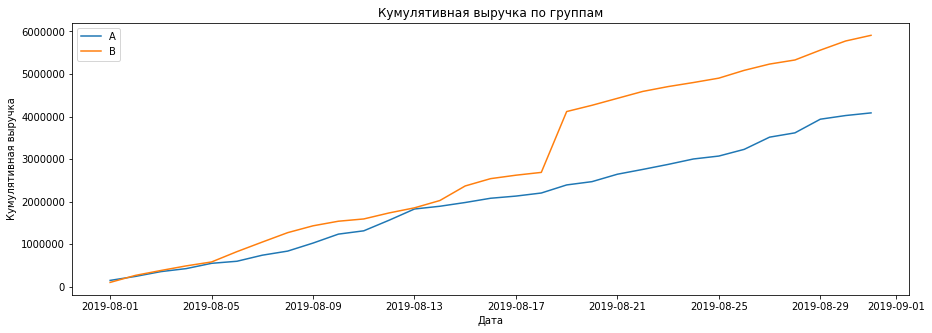

In [14]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['revenue_cummulative_a'], label='A')
plt.plot(data['date'], data['revenue_cummulative_b'], label='B')
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.show()

#### Кумулятивный средний чек по группам

Построим график кумулятивного среднего чека по группам. Как мы видим, кумулятивный средний чек в группе A стабилизировался примерно в середине теста - после 13 августа. В группе B мы можем наблюдать резкий скачок чека после 17 августа, а далее чек стабилизировался и был выше чека в группе A. Резкий скачок также может объясняться аномальными значениями в этой группе.

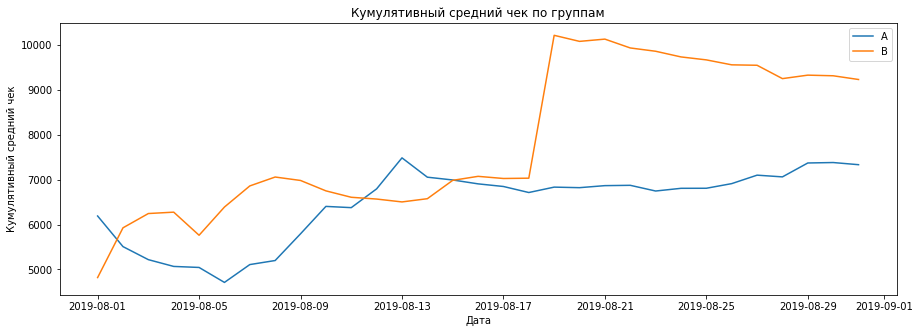

In [15]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['revenue_cummulative_a']/data['orders_cummulative_a'], label='A')
plt.plot(data['date'], data['revenue_cummulative_b']/data['orders_cummulative_b'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.show()

#### Относительное изменение кумулятивного среднего чека в группе B к группе A

Построим график относительного различия для кумулятивного среднего чека. Как мы видим, график на протяжении практически всего теста резко скачет. Самый значительный скачок произошел в районе 17-19 августа. Скачки также могут говорить о выбросах в группе B.

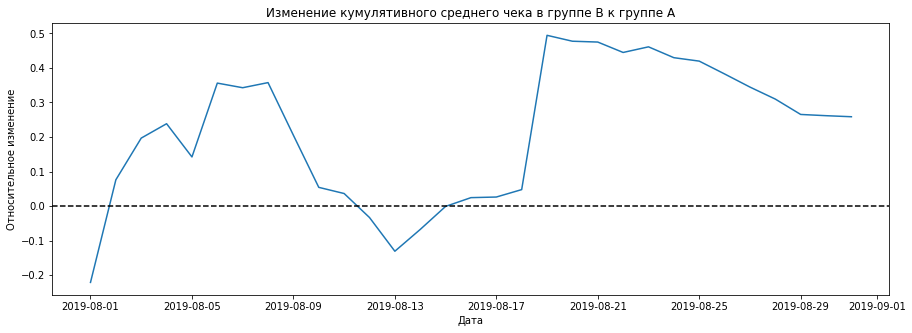

In [16]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], (data['revenue_cummulative_b']/data['orders_cummulative_b'])/(data['revenue_cummulative_a']/data['orders_cummulative_a'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Изменение кумулятивного среднего чека в группе B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()

#### Кумулятивная конверсия по группам

Построим график кумулятивной конверсии по группам. В начале теста в обеих группах были колебания, и конверсия группы В была ниже, однако затем, начиная с 5 мая, резко выросла и оставалась стабильно выше конверсии в группе А. Стоит проверить, связано ли это с выбросами в этой группе.

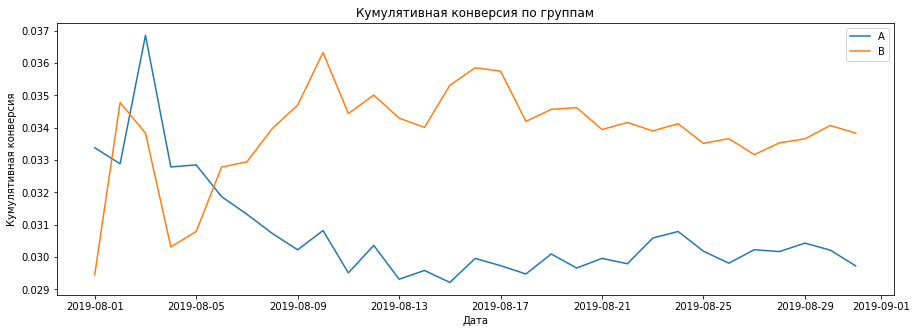

In [17]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['orders_cummulative_a']/data['visitors_cummulative_a'], label='A')
plt.plot(data['date'], data['orders_cummulative_b']/data['visitors_cummulative_b'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.show()

#### Относительное изменение кумулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы В к группе А. По графику можно сделать вывод, что конверсия в группе B практически на протяжении всего теста выше конверсии в группе А, так что можно сделать вывод либо об успешном изменении при тестировании гипотезы в А/B тесте, либо о наличии выбросов.

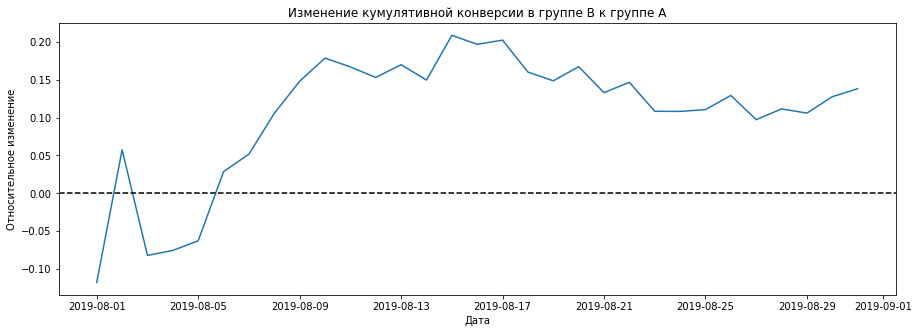

In [18]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], (data['orders_cummulative_b']/data['visitors_cummulative_b'])/(data['orders_cummulative_a']/data['visitors_cummulative_a'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Изменение кумулятивной конверсии в группе B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()

#### Вывод по разделу

В этом разделе мы изучили кумулятивные метрики: выручку, средний чек и его изменение в группе В к группе А, конверсию и ее изменение в группе В к группе А. Группа В имеет более высокие оценки по всем показателям, однако при этом графики кумулятивных метрик в ней более активно скачут, что может говорит также и о наличии выбросов в этой группе.

### Определение выбросов в данных

В этом разделе мы определим аномальные наблюдения в числе и стоимости заказов по диаграммам рассеяния и подсчету 95-го и 99-го перцентилей.

#### Количество заказов по пользователям

Построим диаграмму рассеяния количества заказов по пользователям. Как мы можем видеть, большинство пользователей совершает 1 заказ, значительно меньше совершают 2 заказа. Вероятно, совсем редки те, кто совершает более 2 заказов, и это могут быть аномальные пользователи.

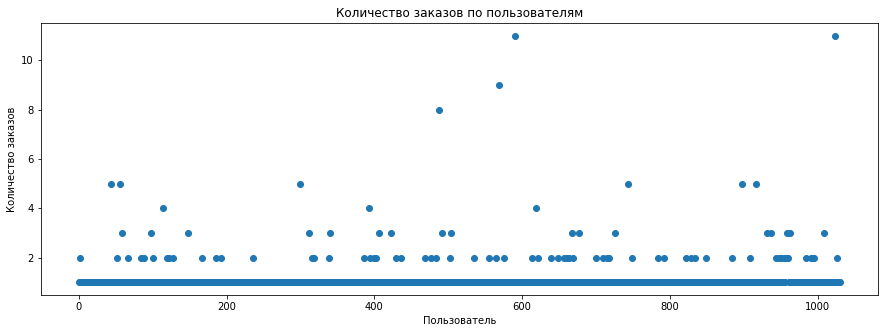

In [19]:
number_of_orders =(
    orders.drop(['revenue', 'date'], axis=1).
    groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
x_values = pd.Series(range(0,len(number_of_orders['transactionId'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, number_of_orders['transactionId'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.show()

Определим 95-й и 99-й перцентили количества заказов. Не более 5 % пользователей делают более 5 заказов, не более 1 % пользователей делают более 4 заказов.

In [20]:
print('95-й перцентиль количества заказов:', np.percentile(number_of_orders['transactionId'], [95]), '\n',
      '99-й перцентиль количества заказов:', np.percentile(number_of_orders['transactionId'], [99]))

95-й перцентиль количества заказов: [2.] 
 99-й перцентиль количества заказов: [4.]


#### Стоимость заказов по пользователям

Построим диаграмму рассеяния стоимости заказов по пользователям. Большинство заказов не достигают 25 000. Вероятно, значения, близкие к 100 000, будут выбросами. 

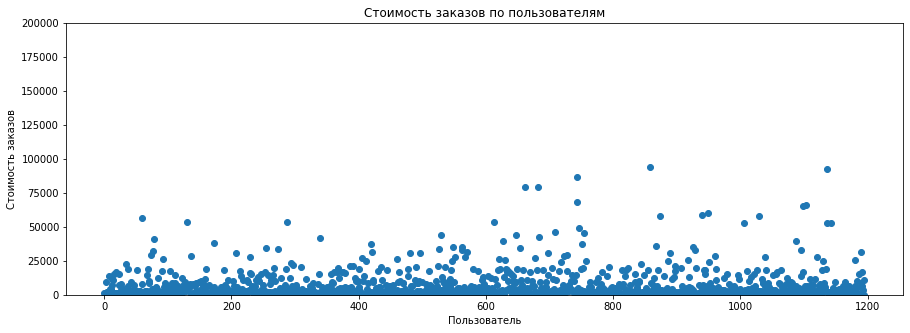

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказов')
plt.ylim(0, 200000)
plt.show()

Определим 95-й и 99-й перцентили стоимости заказов. Как мы видим, не более 5 % пользователей совершают покупки на сумму более 28 000, не более 1 % пользователей совершают покупки на сумму более 58 233.2

In [22]:
print('95-й перцентиль количества заказов:', np.percentile(orders['revenue'], [95]), '\n',
      '99-й перцентиль количества заказов:', np.percentile(orders['revenue'], [99]))

95-й перцентиль количества заказов: [28000.] 
 99-й перцентиль количества заказов: [58233.2]


#### Вывод по разделу

В этом разделе мы определили аномальные наблюдения. Что касается числа заказов, то не более 5 % пользователей делают более 5 заказов, не более 1 % пользователей делают более 4 заказов. Если говорить о стоимости заказов, то не более 5 % пользователей совершают покупки на сумму более 28 000, не более 1 % пользователей совершают покупки на сумму более 58 233.2.

### Анализ результатов A/B теста

#### Различия в конверсии между группами по «сырым» данным

Для того, чтобы определить, какой из статистических тестов нам понадобится для сравнения групп, проверим выборки на нормальность распределения. Сначала посмотрим на плотность распределения переменной заказов в каждой выборке. Как мы видим, распределение заказов в каждой выборке имеет сильную положительную асимметрию, что может говорить о том, что распределения далеки от нормальных. Дополнительно проверим распределения на нормальность с помощью критерия Шапиро-Уилка.

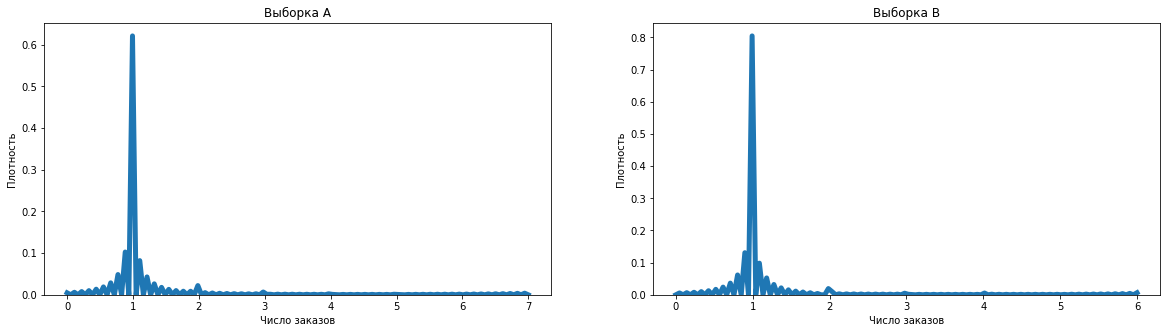

In [23]:
plt.figure(figsize = (20, 5))
sns.distplot(sample_a, hist = False, kde = True,
                 kde_kws = {'linewidth': 5}, ax=plt.subplot(1,2,1))
plt.title('Выборка A')
plt.xlabel('Число заказов')
plt.ylabel('Плотность')

sns.distplot(sample_b, hist = False, kde = True,
                 kde_kws = {'linewidth': 5}, ax=plt.subplot(1,2,2))
plt.title('Выборка B')
plt.xlabel('Число заказов')
plt.ylabel('Плотность')
plt.show()

Критерий Шапиро-Уилка показывает, что на уровне доверительной вероятности 95 % распределения числа заказов в обеих группах не являются нормальными, что свидетельствует в пользу использования методов непараметрической статистики при сравнении групп - теста Уилкоксона-Манна-Уитни.

In [24]:
alpha = 0.05

results_a = st.shapiro(sample_a)
p_value_a = results_a[1]

print('p-value в выборке A: ', p_value_a)

if p_value_a < alpha:
    print('Отвергаем нулевую гипотезу: распределение в выборке A не нормально', '\n\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально', '\n\n')
    
results_b = st.shapiro(sample_b)
p_value_b = results_b[1]

print('p-value в выборке B: ', p_value_b)

if p_value_b < alpha:
    print('Отвергаем нулевую гипотезу: распределение в выборке B не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-value в выборке A:  0.0
Отвергаем нулевую гипотезу: распределение в выборке A не нормально 


p-value в выборке B:  0.0
Отвергаем нулевую гипотезу: распределение в выборке B не нормально


Используем непараметрический тест Уилкоксона-Манна-Уитни. Формулируем нулевую и альтернативную гипотезы:
* H0: Конверсии в группах А и В равны
* Н1: Конверсии в группах А и В отличаются

Мы будем использовать двустооронний тест здесь и далее, так как при проведении теста можем ожидать изменения метрик как в большую, так и в меньшую сторону. Также установленный уровень доверительной вероятности - 95 %. Полученный p-value равен 0.008 и меньше 0.05 при установленном уровне дов. вероятности, так что у нас достаточно оснований отвергнуть нулевую гипотезу в пользу альтернативной. Относительный прирост конверсии группы B к группе А равен 13.8 %.

In [25]:
print('P-value критерия Уилкоксона-Манна-Уитни:', round(st.mannwhitneyu(sample_a, sample_b)[1], 3), '\n',
     'Относительный прирост конверсии группы B к группе А:', round(sample_b.mean() / sample_a.mean() - 1, 3))

P-value критерия Уилкоксона-Манна-Уитни: 0.008 
 Относительный прирост конверсии группы B к группе А: 0.138


#### Различия в среднем чеке по "сырым" данным

Для определения необходимого статистического теста рассмотрим распределения стоимости чеков в группах. Здесь мы также можем заметить сильную положительную асимметрию, которая может говорить об отсутствии нормального распределения и невозможности применения параметрического теста.

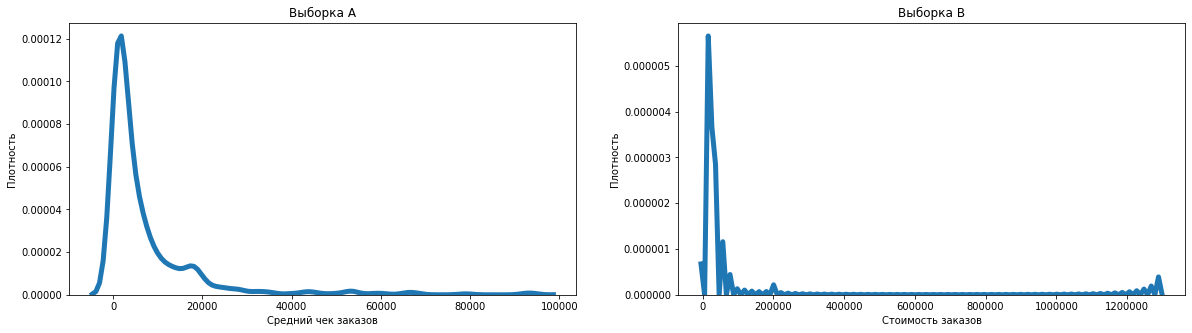

In [26]:
plt.figure(figsize = (20, 5))
sns.distplot(orders[orders['group']=='A']['revenue'], hist = False, kde = True,
                 kde_kws = {'linewidth': 5}, ax=plt.subplot(1,2,1))
plt.title('Выборка A')
plt.xlabel('Средний чек заказов')
plt.ylabel('Плотность')

sns.distplot(orders[orders['group']=='B']['revenue'], hist = False, kde = True,
                 kde_kws = {'linewidth': 5}, ax=plt.subplot(1,2,2))
plt.title('Выборка B')
plt.xlabel('Стоимость заказов')
plt.ylabel('Плотность')
plt.show()

Критерий Шапиро-Уилка показал, что распределения не нормальны, а значит мы будем применять непараметрический тест Уилкоксона-Манна-Уитни для сравнения средних чеков.

In [27]:
results_a = st.shapiro(orders[orders['group']=='A']['revenue'])
p_value_a = results_a[1]

print('p-value в выборке A: ', p_value_a)

if p_value_a < alpha:
    print('Отвергаем нулевую гипотезу: распределение в выборке A не нормально', '\n\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально', '\n\n')
    
results_b = st.shapiro(orders[orders['group']=='B']['revenue'])
p_value_b = results_b[1]

print('p-value в выборке B: ', p_value_b)

if p_value_b < alpha:
    print('Отвергаем нулевую гипотезу: распределение в выборке B не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-value в выборке A:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение в выборке A не нормально 


p-value в выборке B:  0.0
Отвергаем нулевую гипотезу: распределение в выборке B не нормально


Формулируем статистические гипотезы для теста Уилкоксона-Манна-Уитни:
* H0: Средние чеки в группах А и В равны
* Н1: Средние чеки в группах А и В отличаются

На уровне доверительной вероятности 95 % у нас недостаточно оснований отвергнуть нулевую гипотезу о равенстве средних чеков. Таким образом, мы можем сделать вывод, что относительный прирост среднего чека в группе В к группе А, равный 25.9 % - это случайное колебание.

In [28]:
print('P-value критерия Уилкоксона-Манна-Уитни:', round(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], 3),
      '\n', 'Относительный прирост среднего чека группы B к группе А:', round(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1, 3))

P-value критерия Уилкоксона-Манна-Уитни: 0.365 
 Относительный прирост среднего чека группы B к группе А: 0.259


#### Различия в конверсии по "очищенным" данным

Собираем идентификационные данные аномальных пользователей. Как мы определили в разделе 2.3, аномальные пользователи совершают более 2 заказов либо совершают заказы на суммы более 28 000. Сделаем срезы пользователей с такими заказами и объединим их в одну таблицу. Всего 74 аномальных пользователя.

In [30]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > np.percentile(number_of_orders['transactionId'], [95])[0]]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > np.percentile(number_of_orders['transactionId'], [95])[0]]['user_id'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95])[0]]['visitorId']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_users.head(5))
print(abnormal_users.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: object
(74,)


Проводим непараметрический тест Уилкоксона-Манна-Уитни без аномальных пользователей. Формулируем статистические гипотезы:
* H0: Конверсии в группах А и В равны
* Н1: Конверсии в группах А и В отличаются

P-value равен 0.007, и на уровне доверительной вероятности 95 % у нас достаточно оснований отвергуть нулевую гипотезу в пользу альтернативной и подтвердить различие в конверсии между группами. Относительный прирост конверсии группы B к группе А равен 17.3 %, он увеличился при удалении выбросов.

In [31]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value критерия Уилкоксона-Манна-Уитни:', round(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1], 3), '\n',
     'Относительный прирост конверсии группы B к группе А:', round(sample_b_filtered.mean() / sample_a_filtered.mean() - 1, 3))

P-value критерия Уилкоксона-Манна-Уитни: 0.007 
 Относительный прирост конверсии группы B к группе А: 0.173


#### Различия в среднем чеке по "очищенным" данным

Проводим непараметрический тест Уилкоксона-Манна-Уитни. Формулируем статистические гипотезы:

* H0: Средние чеки в группах А и В равны
* Н1: Средние чеки в группах А и В отличаются

P-value теста равен 0.369, и при доверительной вероятности 95 % у нас недостаточно оснований отвергнуть нулевую гипотезу о равенстве средних чеков в группах. Также мы можем видеть, что после удаления выбросов прирост среднего чека в группе В практически нулевой по сравнению с группой А.

In [32]:
print('P-value критерия Уилкоксона-Манна-Уитни:', round(st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )]['revenue'],)[1], 3))

print('Относительный прирост среднего чека группы B к группе А:', round(orders[
            np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )]['revenue'].mean()
            /
            orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )]['revenue'].mean()- 1, 3))

P-value критерия Уилкоксона-Манна-Уитни: 0.369
Относительный прирост среднего чека группы B к группе А: -0.02


#### Вывод по разделу

В этом разделе мы провели тесты Уилкоксона-Манна-Уитни и сравнили конверсии и средние чеки в группах по сырым и очищенным данным. И по сырым, и по очищенным данным мы увидели, что существуют статистически значимые различия в группах по конверсии (конверсия в группе B выше) и отсутствуют различия по среднему чеку.

### Общий вывод

В этом проекте мы приоритизировали гипотезы для тестирования, а также анализировали результаты A/B теста.

По результатам первой части исследования (приоритизация гипотез) оказалось, что первыми следует тестировать 2 гипотезы:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


Что касается результатов A/B теста, то, исходя из обнаруженных данных, следует остановить тест и признать его успешным. Мы нашли статистически значимые различия в конверсии между группами и отсутствие различий в среднем чеке. Что касается среднего чека, то, согласно графику кумулятивного среднего чека (пункт 2.2.2) кумулятивный чек стабилизировался и скорее всего продолжит оставаться примерно на этом же уровне в обеих группах. График относительного изменения кумулятивного среднего чека (пункт 2.2.3) пока показывает, что группа B имеет более высокий средний чек, однако этот показатель снижается с каждым днем и, вероятно, скоро достигнет 0.

Таким образом, по результатам A/B теста можно сделать вывод, что тестируемое изменение увеличивает конверсию пользователей, однако оставляет их средний чек на том же уровне. Таким образом, можно сделать вывод, что выручка увеличивается, однако она увеличивается за счет привлечения новых покупателей (пользователелей, которые перешли в покупатели), а не за счет увеличения стоимости покупок.